# Data Exploration Customer behaviour 
## --Variable Identification--
The data is one of the publicity available datasets from IBM with the following variables: 
1.'Customer',
2.'State',
3.'Customer Lifetime Value',
4.**'Response'**,
5.'Coverage',
6.'Education',
7.'Effective To Date',
8.'EmploymentStatus',
9.'Gender',
10.'Income',
11.'Location Code',
12.'Marital Status',
13.'Monthly Premium Auto',
14.'Months Since Last Claim',
15.'Months Since Policy Inception',
16.'Number of Open Complaints',
17.'Number of Policies',
18.'Policy Type',
19.'Policy',
20.'Renew Offer Type',
21.'Sales Channel',
22.'Total Claim Amount',
23.'Vehicle Class',
24.'Vehicle Size'.
The **TARGET** is Response

<br>
## 1. Load Data
### b

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os


os.getcwd()

data_directory = os.path.join(
    '/Users/niloofarzarifi/Desktop/Udacity/khaneh/Watson-IBM-customer/MTC-PYTHON-PROJECT')
DATA = pd.read_csv(os.path.join(data_directory, "Marketing-Customer.csv"))

### 2. Missing values
<br>
Check for missing value or specific charactor or number. For example age=999 for customer could mean missing data.
The 'find_value' will check the index of requested value for all columns 

In [32]:
COL_LIST=list(DATA)  ##Or DATA.Columns Or# DATA.columns.tolist()
COL_LIST_OBJECT=list(DATA.select_dtypes(include =['O'])) #['float64'] Or ['O'] or ['int64']


def find_value(check_value):
    if type(check_value)==str:  #error if you check str for float or int columns
        for i in range(len(COL_LIST_OBJECT)):
            case={COL_LIST_OBJECT[i]:list(DATA[DATA[COL_LIST_OBJECT[i]]==check_value].index)}
            print(case)         
    else:
        print ('Looking for number:%d'%check_value, "in all columns")
        for i in range(len(COL_LIST)):
            case={COL_LIST[i]:list(DATA[DATA[COL_LIST[i]]==check_value].index)}
            print(case)

In [33]:
find_value('999') #run for any string or specific number 

{'Customer': []}
{'State': []}
{'Response': []}
{'Coverage': []}
{'Education': []}
{'Effective To Date': []}
{'EmploymentStatus': []}
{'Gender': []}
{'Location Code': []}
{'Marital Status': []}
{'Policy Type': []}
{'Policy': []}
{'Renew Offer Type': []}
{'Sales Channel': []}
{'Vehicle Class': []}
{'Vehicle Size': []}


Now, check for NaN values

In [34]:
DATA.apply(lambda x: sum(x.isnull()))
DATA.isnull().sum()  

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [35]:
DATA.apply(lambda x: x.nunique())
DATA.apply(lambda x:len(x.unique()))

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

**Count unique value for each column**
<br>
majority of columns are categorical

In [36]:
#Most of the attributes have few labels. we can do lots of grouping   

DicOfCol={} 
for i in range(0,len(COL_LIST)):
    case={COL_LIST[i]:DATA[COL_LIST[i]].nunique()} 
    DicOfCol.update(case)

print ('unique values in each columns: ',DicOfCol ) 


('unique values in each columns: ', {'Customer': 9134, 'Vehicle Size': 3, 'Gender': 2, 'Number of Policies': 9, 'Renew Offer Type': 4, 'Income': 5694, 'Policy': 9, 'Customer Lifetime Value': 8041, 'Total Claim Amount': 5106, 'EmploymentStatus': 5, 'Vehicle Class': 6, 'State': 5, 'Location Code': 3, 'Monthly Premium Auto': 202, 'Sales Channel': 4, 'Months Since Last Claim': 36, 'Number of Open Complaints': 6, 'Marital Status': 3, 'Policy Type': 3, 'Coverage': 3, 'Effective To Date': 59, 'Education': 5, 'Response': 2, 'Months Since Policy Inception': 100})


**Frequency of Categories**

In [37]:
# filter categorical varaible
categorical_columns=[x for x in DATA.dtypes.index if DATA.dtypes[x]=='object']
# Exclude ID
categorical_columns=[x for x in categorical_columns if x not in ['Customer']]
# print freqencies of variables
for col in categorical_columns:
    print ('\nFrequency of Categories for variables %s'%col)
    print (DATA[col].value_counts())
    


Frequency of Categories for variables State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Frequency of Categories for variables Response
No     7826
Yes    1308
Name: Response, dtype: int64

Frequency of Categories for variables Coverage
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Frequency of Categories for variables Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

Frequency of Categories for variables Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/28/11    161
2/10/11    161
1/21/11    160
1/2/11     160
1/29/11    160
2/3/11   

## 2. Analytics on Engaged Customers
<br>

Text(0,0.5,'Count')

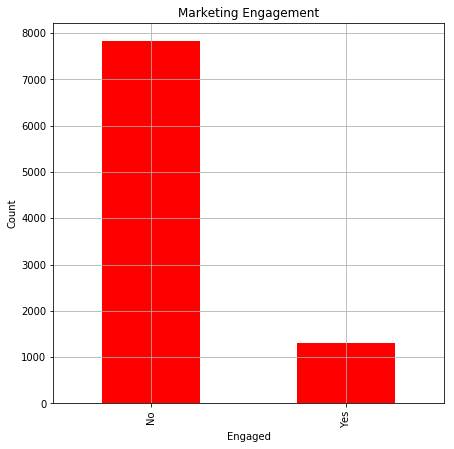

In [8]:
#customer response
DATA.groupby('Response').count()['Customer']
ax=DATA.groupby('Response').count()['Customer'].plot(kind='bar',color='red',grid=True,
               figsize=(7,7),title='Marketing Engagement')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

In [84]:
DATA.groupby('Response').count()['Customer']/DATA.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64


**Engagement Rate per month** 
<br>
The rate of those customers that have positive response ('Yes' value ) to the marketing effort 

In [10]:
#####____________________Time_______________########
#indicats that the dataset only shows months 1,2 in 2011. Therfore, we do not have season info
import datetime

df1_date=DATA
def splitTime(df_name,column_name):
    df_name['year'] = pd.DatetimeIndex(df_name[column_name]).year
    df_name['month'] = pd.DatetimeIndex(df_name[column_name]).month
    df_name['day'] = pd.DatetimeIndex(df_name[column_name]).day

splitTime(df1_date,'Effective To Date')

print (df1_date.year.value_counts())
print (df1_date.month.value_counts())
#df1_date.day.value_counts()

2011    9134
Name: year, dtype: int64
1    4898
2    4236
Name: month, dtype: int64


Text(0,0.5,'Engagement Rate per month%')

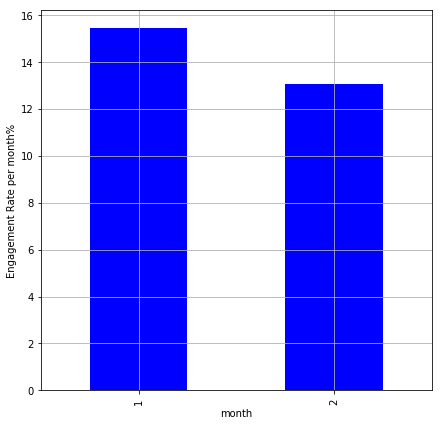

In [11]:
# Majority of Customers have negative engagement and February is worse than first month  
Location_yes=df1_date.loc[df1_date['Response']=='Yes'] 
yes_renew=Location_yes.groupby(['month']).count()['Customer']
all_renew=df1_date.groupby(['month']).count()['Customer']

rates_preRenewal=yes_renew/all_renew  

ax=(rates_preRenewal*100).plot(kind='bar',figsize=(7,7),color='blue',grid=True)
ax.set_ylabel('Engagement Rate per month%')

Last days of the month have better response 

Text(0,0.5,'Engagement Rate per day%')

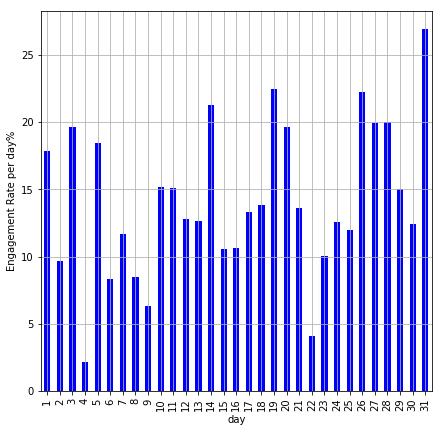

In [12]:
# even the best engagement rate per day is less than 30%, 70% has Response=NO

Location_yes=df1_date.loc[df1_date['Response']=='Yes'] 
yes_renew=Location_yes.groupby(['day']).count()['Customer']
all_renew=df1_date.groupby(['day']).count()['Customer']

rates_preRenewal=yes_renew/all_renew  

ax=(rates_preRenewal*100).plot(kind='bar',figsize=(7,7),color='blue',grid=True)
ax.set_ylabel('Engagement Rate per day%')
#plt.savefig('day_yes',dpi=600,bbox_inches='tight')
#plt.how()


**Complementary plot with Response=No**

Text(0,0.5,'Engagement Rate per day%')

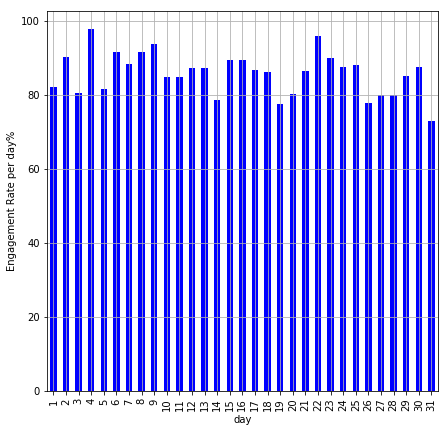

In [13]:
Location_no=df1_date.loc[df1_date['Response']=='No'] 
no_renew=Location_no.groupby(['day']).count()['Customer']
all_renew=df1_date.groupby(['day']).count()['Customer']

rates_preRenewal=no_renew/all_renew  

ax=(rates_preRenewal*100).plot(kind='bar',figsize=(7,7),color='blue',grid=True)
ax.set_ylabel('Engagement Rate per day%')

In [89]:
##----------------groupby practice--------------------
#Customer_ID s are unique. It only helps to count 
# These lines, similar answer
DATA.groupby(['EmploymentStatus']).count()['Customer']
DATA.groupby(by='EmploymentStatus', as_index=False).agg({'Customer': pd.Series.nunique})
DATA.groupby('EmploymentStatus')['Customer'].count()
DATA.groupby('EmploymentStatus')['Customer'].nunique()
DATA.Customer.groupby([DATA.EmploymentStatus.str.strip("'")]).nunique()

##check the difference
DATA.groupby(['EmploymentStatus', 'Customer']).count()
DATA.groupby(['Customer', 'EmploymentStatus']).count()

DATA.groupby('EmploymentStatus')['Education'].count() #Education is categorical ,not unique value
DATA.groupby('EmploymentStatus')['Education'].nunique()

EmploymentStatus
Disabled         5
Employed         5
Medical Leave    5
Retired          5
Unemployed       5
Name: Education, dtype: int64

## crosstab, two categorical values
<br>
** Education vs EmploymentStatus **
<br>
Majority of customers are in Employed group 

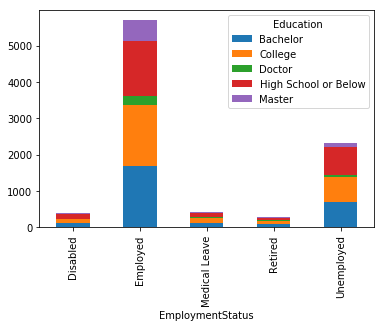

In [14]:
import seaborn as sns


crosstab=pd.crosstab(DATA.EmploymentStatus,DATA.Education,margins=False)
crosstab2=pd.crosstab(DATA.EmploymentStatus,DATA.Education,margins=True) 
#crosstab2 includes groupby result
#if I plot crosstab2 I have extra data related to 'All' or sum values of that group

crosstab.plot.bar(stacked=True)
plt.legend(title='Education')




In [15]:
crosstab2

Education,Bachelor,College,Doctor,High School or Below,Master,All
EmploymentStatus,,,,,,
Disabled,121,98,22,118,46,405
Employed,1702,1664,249,1528,555,5698
Medical Leave,126,145,17,115,29,432
Retired,88,102,1,72,19,282
Unemployed,711,672,53,789,92,2317
All,2748,2681,342,2622,741,9134


#### Disabled, retired and medical leave are the minority groups and we cannot see details so we stack and replot

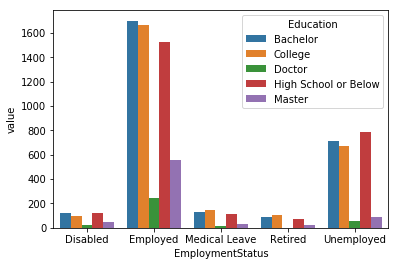

In [16]:
%matplotlib inline
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
sns.barplot(x=stacked.EmploymentStatus, y=stacked.value, hue=stacked.Education)
#plt.savefig('emp_Edu_unstacked',dpi=600,bbox_inches='tight')

## pivot_table
<br>
Determine the average weight per Customer Lifetime Value, default for pivot table is the mean value

In [17]:
item_avg_weight=DATA.pivot_table(values='Customer Lifetime Value',index=['State','Education'])
item_avg_weight

Customer Lifetime Value
State      Education                                    
Arizona    Bachelor                          7549.753844
           College                           7959.857456
           Doctor                            6654.120147
           High School or Below              8240.505244
           Master                            7989.483931
California Bachelor                          8054.937661
           College                           7815.547914
           Doctor                            7221.641498
           High School or Below              8108.190697
           Master                            8456.532112
Nevada     Bachelor                          8615.473401
           College                           7206.519200
           Doctor                            7933.681973
           High School or Below              8461.635883
           Master                            7484.708619
Oregon     Bachelor                          7782.307780
           College                           8127.349688
           Doctor                            8213.028864
           High School or Below              8229.441820
           Master                            8394.312646
Washington Bachelor                          7266.570898
           College                           7504.846289
           Doctor                            7797.674194
           High School or Below              9100.006958
           Master                            8371.167811

**visualuze the mean of customer lifetime value for each state and Education**

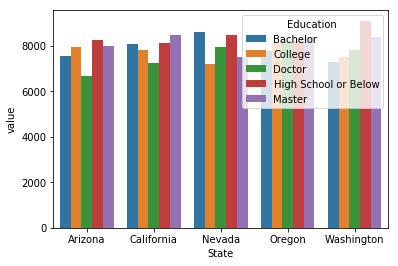

In [18]:
stacked = item_avg_weight.stack().reset_index().rename(columns={0:'value'})
# plot grouped bar chart
sns.barplot(x=stacked.State, y=stacked.value, hue=stacked.Education)

Grouping State and Education to check average of 'Customer Lifetime Value' and min, max and average of 'Total Claim Amount' 

In [19]:
pd.pivot_table(DATA, values=['Customer Lifetime Value', 'Total Claim Amount'], index=['State','Education'],
                     aggfunc={'Customer Lifetime Value': np.mean,
                              'Total Claim Amount': [min, max, np.mean]})

Customer Lifetime Value Total Claim Amount  \
                                                   mean                max   
State      Education                                                         
Arizona    Bachelor                         7549.753844        2893.239678   
           College                          7959.857456        1956.368115   
           Doctor                           6654.120147         957.134978   
           High School or Below             8240.505244        2294.631639   
           Master                           7989.483931        1261.319869   
California Bachelor                         8054.937661        2270.508697   
           College                          7815.547914        2327.166394   
           Doctor                           7221.641498        1337.063487   
           High School or Below             8108.190697        2452.894264   
           Master                           8456.532112        1505.230405   
Nevada     Bachelor                         8615.473401        1448.994134   
           College                          7206.519200        1979.444237   
           Doctor                           7933.681973         697.010998   
           High School or Below             8461.635883        2759.794354   
           Master                           7484.708619        1294.700423   
Oregon     Bachelor                         7782.307780        2345.413441   
           College                          8127.349688        2052.000000   
           Doctor                           8213.028864        1286.400000   
           High School or Below             8229.441820        2042.569089   
           Master                           8394.312646        1548.310532   
Washington Bachelor                         7266.570898        2145.600000   
           College                          7504.846289        1684.800000   
           Doctor                           7797.674194         813.600000   
           High School or Below             9100.006958        1961.162049   
           Master                           8371.167811        1294.700423   

                                                        
                                       mean        min  
State      Education                                    
Arizona    Bachelor              416.507744   0.382107  
           College               427.614383   0.769185  
           Doctor                339.460417  20.521312  
           High School or Below  472.089981   1.924709  
           Master                323.664450   3.468912  
California Bachelor              427.631689   2.964380  
           College               429.643467   0.423310  
           Doctor                357.366655   0.887629  
           High School or Below  488.113002   2.549986  
           Master                365.301371   1.489470  
Nevada     Bachelor              435.799692   4.237520  
           College               408.643148   3.550000  
           Doctor                283.272746   6.281344  
           High School or Below  524.067973   0.099007  
           Master                313.173857  15.616535  
Oregon     Bachelor              429.153626   2.028223  
           College               423.319644   1.838367  
           Doctor                335.839879   0.517753  
           High School or Below  482.221101   1.587888  
           Master                358.119735   3.200851  
Washington Bachelor              443.062491  13.073952  
           College               409.065594   4.238626  
           Doctor                334.352187  12.444326  
           High School or Below  488.861794   9.050204  
           Master                363.958304   2.704934

Next two plots indicate that althought the sum of 'Customer Lifetime Value' in California is higher than other states (more customers), the average of this value is almost the same for all five states 

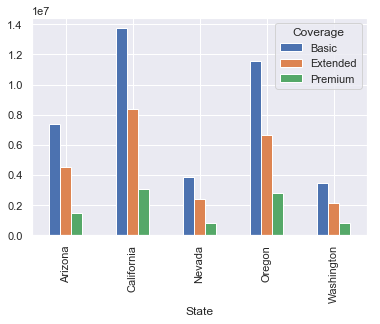

In [20]:
sns.set()
pd.pivot_table(DATA, index='State', columns='Coverage',values='Customer Lifetime Value',aggfunc=np.sum).plot(kind='bar')

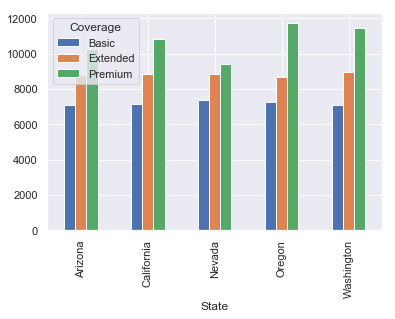

In [21]:
#values must be numerical
sns.set()
pd.pivot_table(DATA, index='State', columns='Coverage',values='Customer Lifetime Value').plot(kind='bar')

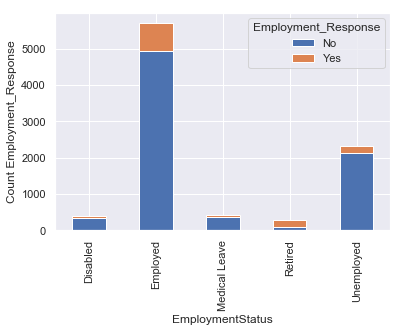

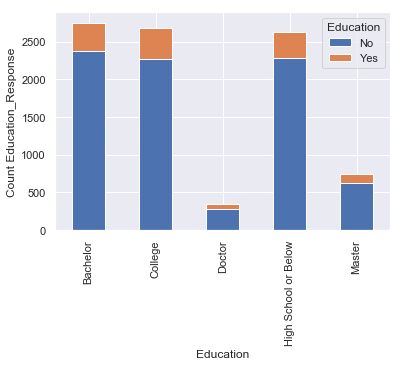

In [22]:
# employment and response

# Only Retired group positively reacts to the market 

Emp_Response=pd.crosstab(DATA.EmploymentStatus,DATA.Response,margins=False)
Emp_Response.plot.bar(stacked=True)
plt.ylabel('Count Employment_Response')
plt.legend(title='Employment_Response')



# education and response


Edu_Response=pd.crosstab(DATA.Education,DATA.Response,margins=False) #margins=True let us to have extra col=All
Edu_Response.plot.bar(stacked=True)
plt.ylabel('Count Education_Response')
plt.legend(title='Education') #absolute values we need percentage to compare groups


** plot the ratio of Raspone(No/yes) with employment status **
<br>
The percentage plot clarifies that the Retired group is the only group that has positive engagement

Text(0,0.5,'rate%')

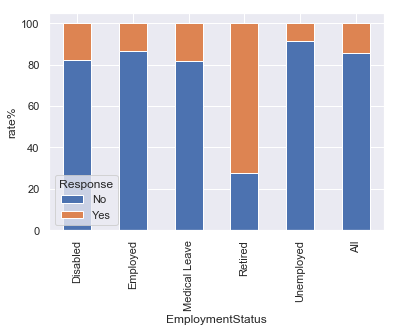

In [23]:
Emp_Response=pd.crosstab(DATA.EmploymentStatus,DATA.Response,margins=True)
df_total = Emp_Response['All']
df_rel = Emp_Response[Emp_Response.columns[0:]].div(df_total, 0)*100 #generate percentage
df_rel
df_rel=df_rel.drop(['All'], axis=1)
df_rel.plot.bar(stacked=True) 
plt.ylabel('rate%')
#plt.savefig('Edu_Res_percentage',dpi=600,bbox_inches='tight')


#### here we show values (%) on the bar

Response,No,Yes
EmploymentStatus,,
Disabled,82.0,18.0
Employed,87.0,13.0
Medical Leave,82.0,18.0
Retired,28.0,72.0
Unemployed,91.0,9.0
All,86.0,14.0


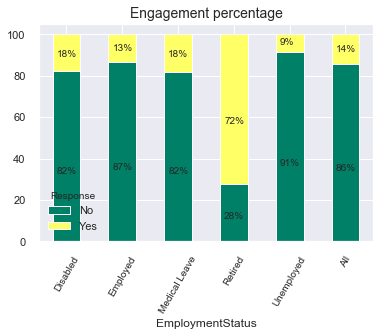

In [127]:
ax=df_rel.plot(kind='bar', stacked=True, colormap="summer")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.0%}'.format(height/100), (p.get_x() + .15 * width, p.get_y() + .4 * height))
    plt.xticks(fontsize=10, rotation=60)
    ax.set_title('Engagement percentage', fontsize=14 )
    

#replace the following line if you don not want to show "%"
#ax.annotate('{:.0f}'.format(height), (p.get_x() + .15 * width, p.get_y() + .4 * height))

df_rel.round(0)  #rounds the data frame without decimal 

## Sales Channel Succeess vs Education

Text(0.5,1,"Sales success to get Response='Yes' over all Yes/No responses")

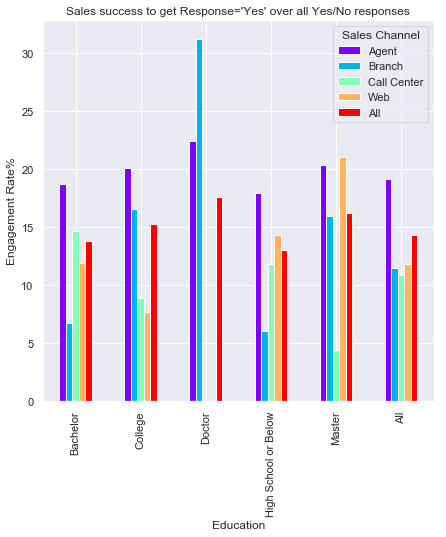

In [24]:
Sale_Edu=pd.crosstab(Location_yes.Education,Location_yes['Sales Channel'],margins=True) 
Total=pd.crosstab(DATA.Education,DATA['Sales Channel'],margins=True) 

rates=(Sale_Edu/Total)*100

ax=(rates).plot(kind='bar',figsize=(7,7),colormap='rainbow',grid=True)
ax.set_ylabel('Engagement Rate%')
ax.set_title("Sales success to get Response='Yes' over all Yes/No responses")
#apparently 'agent' is more successful except PhD group' and call center is less efficient 

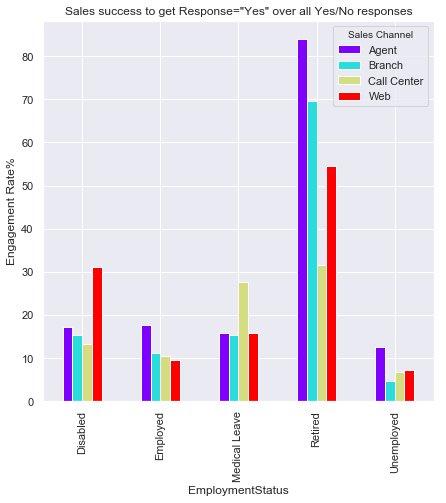

In [41]:
#Sales Channel succeess vs employment 
%matplotlib inline
Location_yes

Sale_Emp=pd.crosstab(Location_yes.EmploymentStatus,Location_yes['Sales Channel'],margins=False) 
Total=pd.crosstab(DATA.EmploymentStatus,DATA['Sales Channel'],margins=False) 

rates=(Sale_Emp/Total)*100

ax=(rates).plot(kind='bar',figsize=(7,7),colormap='rainbow',grid=True)
ax.set_ylabel('Engagement Rate%')
ax.set_title('Sales success to get Response="Yes" over all Yes/No responses')
plt.show()

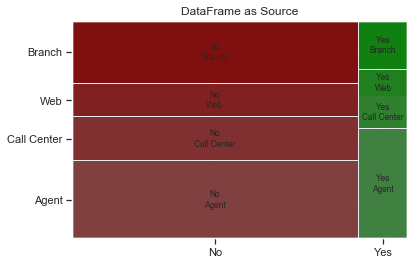

In [42]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(DATA, ['Response', 'Sales Channel'], title='DataFrame as Source')
plt.show()

## Sales Channel Succeess vs Employment

#### Plot all individual Sale channel 

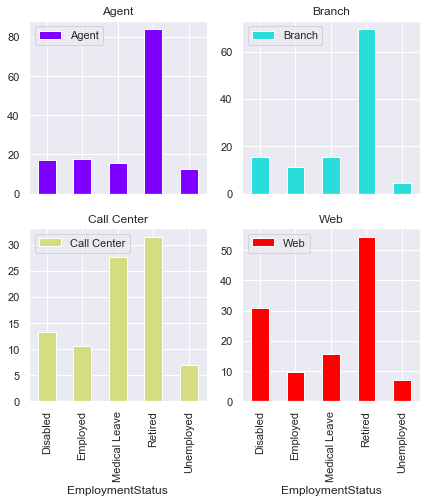

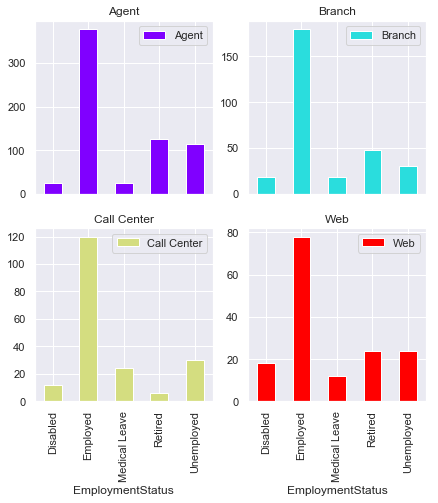

In [44]:
#%matplotlib notebook
%matplotlib inline
# rates=(Sale_Emp/Total)*100 for 'Yes' response
ax=rates.plot(kind='bar',figsize=(7,7),subplots=True, layout=(2,2),colormap='rainbow',grid=True)

# now plot all individual Sale channel 
ax=Sale_Emp.plot(kind='bar',figsize=(7,7),subplots=True, layout=(2,2),colormap='rainbow',grid=True)

In [45]:
print (Sale_Emp)
print (rates)
print (Total)

Sales Channel     Agent  Branch  Call Center  Web
EmploymentStatus                                 
Disabled             24      18           12   18
Employed            378     180          120   78
Medical Leave        24      18           24   12
Retired             126      48            6   24
Unemployed          114      30           30   24
Sales Channel         Agent     Branch  Call Center        Web
EmploymentStatus                                              
Disabled          17.266187  15.384615    13.186813  31.034483
Employed          17.729831  11.104257    10.600707   9.594096
Medical Leave     15.789474  15.384615    27.586207  15.789474
Retired           84.000000  69.565217    31.578947  54.545455
Unemployed        12.610619   4.665630     6.880734   7.185629
Sales Channel     Agent  Branch  Call Center  Web
EmploymentStatus                                 
Disabled            139     117           91   58
Employed           2132    1621         1132  813
Medical L

#### how about frequency

Text(0.5,1,'Sales success to get Response="Yes"')

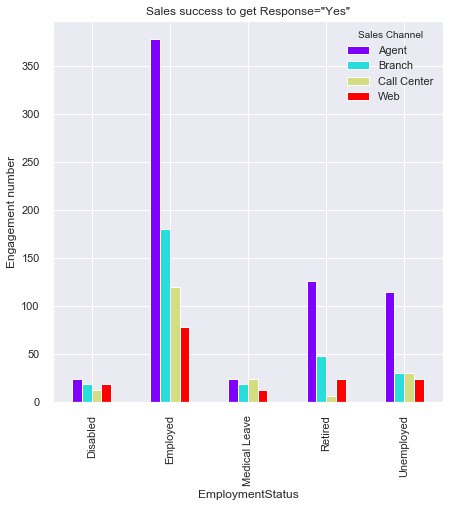

In [111]:
ax=(Sale_Emp).plot(kind='bar',figsize=(7,7),colormap='rainbow',grid=True)
ax.set_ylabel('Engagement number')
ax.set_title('Sales success to get Response="Yes"')
 
#for employed : Engagement Rate% Agent efficiency is almost double 

#### The customers rate that renew offer (Yes responce / Total responce for each group)

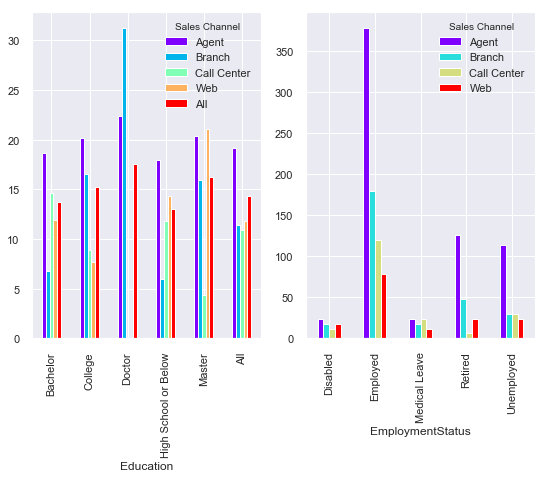

In [112]:
##two Sale_Emp percentage and frequency beside each other :)

fig, axes = plt.subplots(ncols=2)
rates.plot(kind='bar',figsize=(9,6),colormap='rainbow',grid=True,log=False, ax=axes[0])
Sale_Emp.plot(kind='bar',figsize=(9,6),colormap='rainbow',grid=True,ax=axes[1])

### Pie chat for Renew offer Type

Text(0.5,1,'Renew Offer Type')

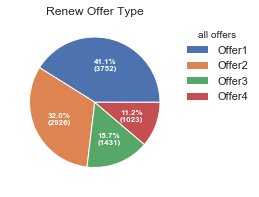

In [113]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["3752  Offer1",
          "2926  Offer2",
          "1432  Offer3",
          "1024  Offer4"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          title="all offers",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Renew Offer Type")

#### Engagement rates per renewal offer type
<br>
offer type 4 has no customer!

Text(0,0.5,'Engagement Rate%')

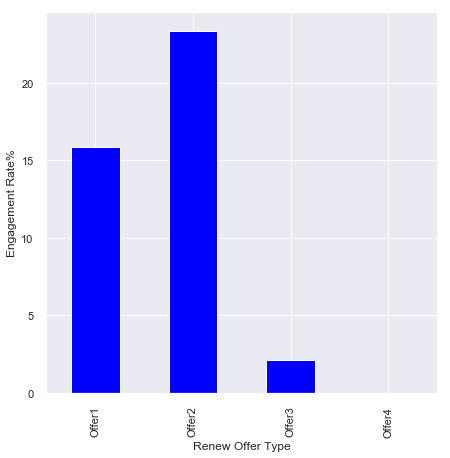

In [114]:
DATA[['Customer','Renew Offer Type','Response']]
DATA.Customer.nunique() #all Customers are Unique
Location_yes=DATA.loc[DATA['Response']=='Yes']  #shows Yes response
Yes_renew=Location_yes.groupby(['Renew Offer Type']).count()['Customer'] #counts renew offer plus 'Yes'
all_renew=DATA.groupby(['Renew Offer Type']).count()['Customer'] #counts all Yes/no renew offer type

#shows pernentage of renew offer with Yes response
rates_preRenewal=Yes_renew/all_renew  #offer4 has zero 'Yes'!

ax=(rates_preRenewal*100).plot(kind='bar',figsize=(7,7),color='blue',grid=True)
ax.set_ylabel('Engagement Rate%')


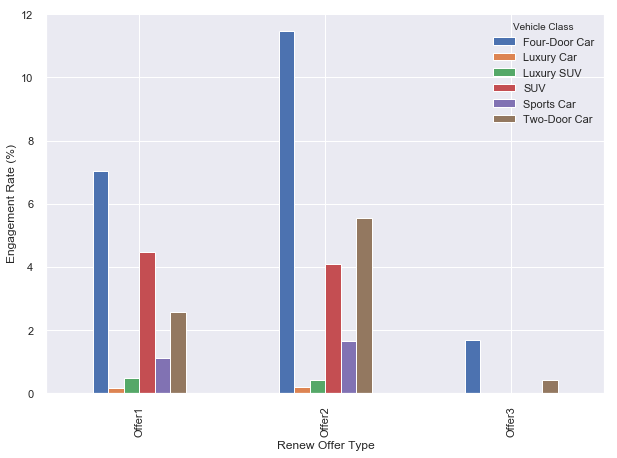

In [115]:
#offer Type vs vehicle type and engagement rate
by_offer_type_data=Location_yes.groupby(['Renew Offer Type', 'Vehicle Class']).count()['Customer']/all_renew

by_offer_type_data = by_offer_type_data.unstack().fillna(0)



ax = (by_offer_type_data*100.0).plot(
    kind='bar',
    figsize=(10, 7),
grid=True )
ax.set_ylabel('Engagement Rate (%)')

plt.show()

Text(0,0.5,'Engagement Rate (%)')

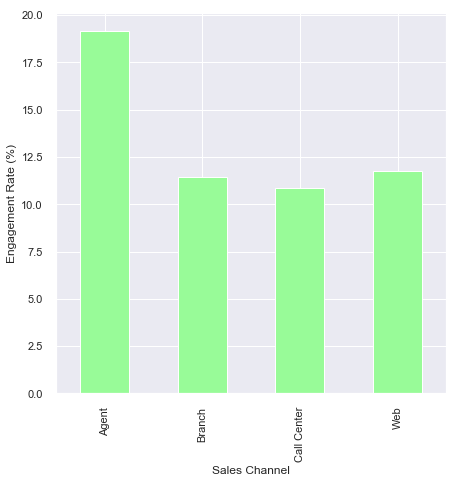

In [116]:
#Engagement Rates by Sales Channel

by_sales_channel_df = DATA.loc[DATA['Response'] == 'Yes'
                               ].groupby(['Sales Channel']).count()['Customer'
                               ]/DATA.groupby(['Sales Channel']).count()['Customer']

ax = (by_sales_channel_df*100.0).plot(kind='bar',figsize=(7, 7), color='palegreen', grid=True)
ax.set_ylabel('Engagement Rate (%)')

Text(0,0.5,'Engagement Rate (%)')

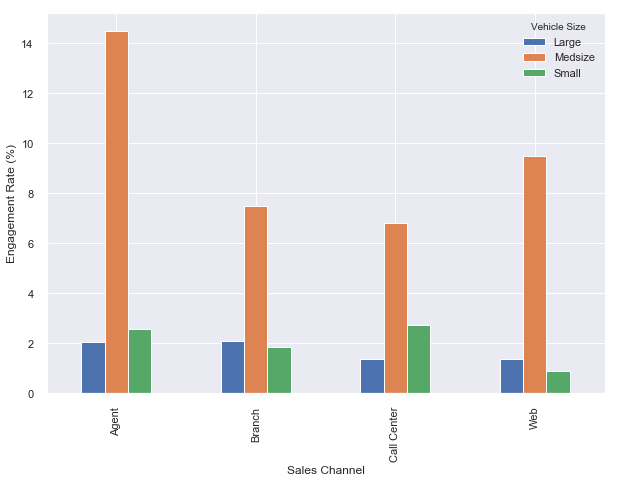

In [117]:
# Sales Channel & Vehicle Size
by_sales_channel_df = DATA.loc[DATA['Response'] == 'Yes'].groupby(['Sales Channel', 'Vehicle Size'
                              ]).count()['Customer'] / DATA.groupby('Sales Channel').count()['Customer']

by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)

ax = (by_sales_channel_df*100.0).plot(kind='bar',figsize=(10, 7),grid=True )
ax.set_ylabel('Engagement Rate (%)')

#### Engagement Rates by Months Since Policy Inception

Text(0,0.5,'Engagement Rate (%)')

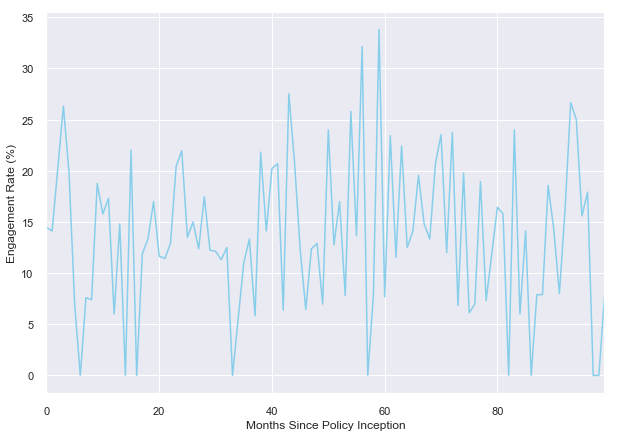

In [118]:
Mon_Resp=DATA.groupby(by='Months Since Policy Inception')['Response'].count()
by_months_since_inception_df = DATA.loc[DATA['Response'] == 'Yes'].groupby(
    by='Months Since Policy Inception')['Response'].count() 

by_months_since_inception_df=by_months_since_inception_df/Mon_Resp * 100

# fill the NaN value with zero
by_months_since_inception_df.fillna(0)

ax = by_months_since_inception_df.fillna(0).plot(figsize=(10, 7),grid=True,color='skyblue')
ax.set_title=('Engagement Rates by Months Since Inception')
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

#### Customer Segmentation by CLV & Months Since Policy Inception

In [119]:
DATA['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [120]:
DATA['CLV Segment'] = DATA['Customer Lifetime Value'].apply(
lambda x: 'High' if x > DATA['Customer Lifetime Value'].median() else 'Low')

DATA['Policy Age Segment'] = DATA['Months Since Policy Inception'].apply(
lambda x: 'High' if x > DATA['Months Since Policy Inception'].median() else 'Low')


Text(0.5,1,'Segments by CLV and Policy Age')

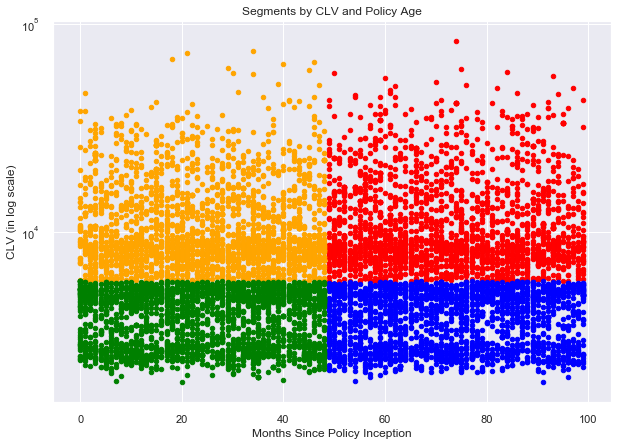

In [121]:
# Visualize these segments

ax = DATA.loc[
    (DATA['CLV Segment'] == 'High') & (DATA['Policy Age Segment'] == 'High')
    ].plot.scatter(x='Months Since Policy Inception', y='Customer Lifetime Value', logy=True,color='red')


DATA.loc[(DATA['CLV Segment'] == 'Low') & (DATA['Policy Age Segment'] == 'High'
         )].plot.scatter(ax=ax,x='Months Since Policy Inception', 
         y='Customer Lifetime Value',logy=True,color='blue')

DATA.loc[(DATA['CLV Segment'] == 'High') & (DATA['Policy Age Segment'] == 'Low'
         )].plot.scatter(ax=ax,x='Months Since Policy Inception', y='Customer Lifetime Value', logy=True,
          color='orange')
DATA.loc[(DATA['CLV Segment'] == 'Low') & (DATA['Policy Age Segment'] == 'Low')].plot.scatter(
         ax=ax,x='Months Since Policy Inception',y='Customer Lifetime Value', logy=True,
         color='green',grid=True,figsize=(10, 7))
         
ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')


Text(0.5,1,'Engagement Rates by Customer Segments')

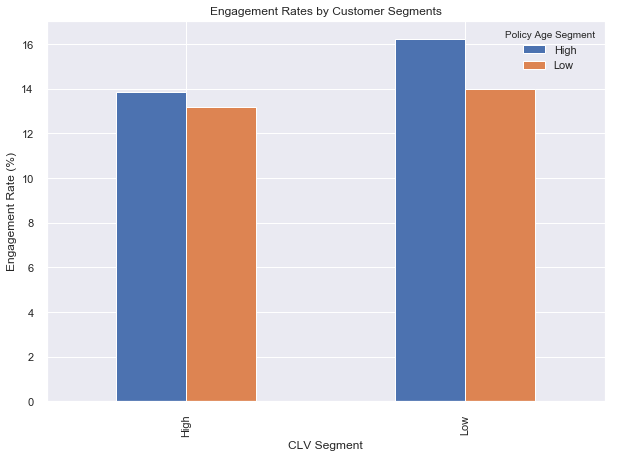

In [122]:
# See whether there is any noticeable difference in the engagement rates

engagement_rates_by_segment_df = DATA.loc[DATA['Response'] == 'Yes'].groupby([
        'CLV Segment', 'Policy Age Segment']). count()['Customer'] / DATA.groupby([
        'CLV Segment', 'Policy Age Segment']).count()['Customer']


engagement_rates_by_segment_df

ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(kind='bar',
             figsize=(10, 7),grid=True )
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

In [59]:
DATA.columns

Index([u'Customer', u'State', u'Customer Lifetime Value', u'Response',
       u'Coverage', u'Education', u'Effective To Date', u'EmploymentStatus',
       u'Gender', u'Income', u'Location Code', u'Marital Status',
       u'Monthly Premium Auto', u'Months Since Last Claim',
       u'Months Since Policy Inception', u'Number of Open Complaints',
       u'Number of Policies', u'Policy Type', u'Policy', u'Renew Offer Type',
       u'Sales Channel', u'Total Claim Amount', u'Vehicle Class',
       u'Vehicle Size', u'year', u'month', u'day', u'CLV Segment',
       u'Policy Age Segment'],
      dtype='object')

In [ ]:
import featuretools as ft
# Create our first entityset
entity_set = ft.EntitySet(id = 'Customer')

# Create client entity
entity_set = entity_set.entity_from_dataframe(
    entity_id='clients',
    dataframe=sheets.get('CLIENTS'),
    index='client_id',
    variable_types={
        'plan': ft.variable_types.Categorical
    }
)

